# Final Assessment Scratch Pad

## Instructions

1. Please use only this Jupyter notebook to work on your model, and **do not use any extra files**. If you need to define helper classes or functions, feel free to do so in this notebook.
2. This template is intended to be general, but it may not cover every use case. The sections are given so that it will be easier for us to grade your submission. If your specific use case isn't addressed, **you may add new Markdown or code blocks to this notebook**. However, please **don't delete any existing blocks**.
3. If you don't think a particular section of this template is necessary for your work, **you may skip it**. Be sure to explain clearly why you decided to do so.

## Report

### Overview
This is a classification task with 3 classes, and the data is highly imbalanced. The data is image data with 3 channels, and the image size is 100x100. The data is preprocessed by removing missing values, handling outliers, oversampling the minority classes, and scaling. The model is built using CNN neural network (PCA + Neural Network was tried, but had a worse performance), and the hyperparameters are tuned manually. The model is evaluated using train-test split and run for several times to get the average performance. The model with the best performance is chosen.


### 1. Data Exploration & Preparation

Basic information about the dataset is provided below.
- Number of the data point: 2911
- Shape: (2911,)
- Unique values: [ 0.  1.  2. nan]
- Number of labels 0: 2392
- Number of labels 1: 203
- Number of labels 2: 25
- Number of labels nan: 291

Short conclusion: this is a classification problem with 3 classes, and the data is highly imbalanced.

### 2. Detection and Handling of Missing Values

Unique value counts: 
- Value: 0.0, Count: 2392
- Value: 1.0, Count: 203
- Value: 2.0, Count: 25
- Value: nan, Count: 291

Action on handling missing value:
- nan in images: drop the rows with missing value in the image data.
- nan in labels: drop the rows together with the corresponded rows in the image data.
- reason: the number of missing value is small, so it is better to drop the rows with missing value.


### 3. Detection and Handling of Outliers
The outliers of the data set can be seen from the distribution of the pixels data:
1.  Centralised at around 0: 
    - 29% of the pixels are in the range of -50 to 50; 
    - 60% of pixels are in the range of -100 to 100; 
    - 88% of pixels are in the range of -200 to 200
2. Wide range of values (have outliers):
    - 98% of pixels are in the range of -300 to 300;
    - there are pixels with values as high as 90000 and as low as -9000

Action to process outliers: make all data within range -200 to 200, the out of range one are scaled up/down to the respective bounds.


### 4. Detection and Handling of Class Imbalance

Based on the descriptive analysis, the data is highly imbalanced. 

Action to process class imbalance: Oversampling class 1 and 2 (undersampled) using image transformation of the existing one.
- transformation: horizontal flip, vertical flip, rotation, etc.
- oversampling size: the largest one *2, the rest are oversampled to around the number of the largest one


### 5. Understanding Relationship Between Variables

Correlation of such instances are investigated:
- the features of each channel: only channel one has its features more correleated (seen in the section below) less correlated
- correlation between 2 channel: all channels are not closely correlated in a large scale.

Action: no action is taken, because the correlation of pixels is not very applicable in CNN.

### 6. Data Visualization
- raw dataset: print out the images using transformation to np.unit8, but no clear sign shown, i.e. cannot be interpreted using domain knowledge 
- scaled and outlier-removed dataset: the images are mostly black and RGB pixels scattered around
- histogram for the distribution of the count of unique classes, unique pixels (for each channel and all together)
- scatter plot & imshow for the correlation matrix

### 7. General Preprocessing
- Data type: All data are numerical, no catagorical data, not applicable.
- Scaling: after handling outliers and removing nan, the data is scaled using RobustScaler, because the data is not normally distributed.

### 8. Feature Selection

Attempts: 
1. ordinary image interpretation:
    - features selections are done implicitly by the CNN layers, so no explicit feature selection is done. 

2. flatten pixels interpretation: 
    - feature selection is done by using PCA, so the number of features is scaled down to 36 for each channel, and the total number of features is 108.

### 9. Feature Engineering

Attempts: 
1. ordinary image interpretation: 
    - tried adding new layers by taking max, min and median, so the total layers were 6
    - However, the performance is not improved, or even worse, so are taken away.
    - main feature engineering are implicitly done by the CNN layers, and implicitly handled by hyperparameters tuning. 

2. flatten pixels interpretation: PCA is already used so no further feature engineering is done.


### 10. Creating models

Two models have been created and tried, the final decision is CNN neural network as the performance is better than PCA + neural network.

1. CNN Neural Network:
    - main idea: the input data has 3 channels, so I see them as 3 images for each data point; and this will be handled as normal image data.
    - implementation: Each channel is handled by a CNN, which will go through several layers and the outputs are concatenated and fed into a neural network to output 3 categories.
    - hyperparameters: 
            - activation function ReLU/LeakyReLU: introduce non-linearity and mitigate the vanishing gradient problem
            - dropout: regularization to prevent overfitting
            - optimizer Adam: known to be better handling large datasets and high dimensional data
            - loss function CrossEntropyLoss: suitable for classification problem

2. PCA + Neural Network:
    - main idea: an alternative to handle image data is to flatten out the whole image. PCA to reduce the number of features, and then feed the reduced features into a neural network.
    - hyperparameters:
        - PCA:
            - number of components = 36
        - neural network: more or less the same as the neural network above.
        
### 11. Model Evaluation
each model is evaluated using train-test split and run for several times to get the average performance. The model with the best performance is chosen.
- Memory and runtime: not an issue in my training.
- f1-score: the f1-score is calculated after every training epoch, and the model is chosen based on the f1-score.

- **Choosing of the model:**
    - Operation: the each configuration is runned for 5 times (as shown in code snippet below), and the model is evaluated by the minimum, maximum, and average f1-score. 
    - Tie Breaker: No absolute tie breaker. Model with lower difference (max - min), i.e. stability and low variance, and higher mean of f1-score, i.e. low bias, is preferred, although both factors are often trade-off of each other. 


### 12. Hyperparameters Search

manual search is done for the hyperparameters, and the final hyperparameters are chosen based on the 

### Conclusion:

The practical test is fun by having a lot of freedom to try different configurations of model. However, the data is not very easy to handle, and the performance is not very good. I think the main reason is that the image data is not very clear and large. The performance can be improved by using more data, and more advanced CNN models. And what we have in hands in very limited as we are a beginner in this field. When certain performance is achieved, there is hardly any improvement can be done; so the performance might not be very accurately reflects one's model, given that everyone's model is quite similar essentially.




### 1. Data Exploration & Preparation

Basic information about the dataset is provided below.
- Number of the data point: 2911
- Shape: (2911,)
- Unique values: [ 0.  1.  2. nan]
- Number of labels 0: 2392
- Number of labels 1: 203
- Number of labels 2: 25
- Number of labels nan: 291

Short conclusion: this is a classification problem with 3 classes, and the data is highly imbalanced.

### 2. Detection and Handling of Missing Values

Unique value counts: 
- Value: 0.0, Count: 2392
- Value: 1.0, Count: 203
- Value: 2.0, Count: 25
- Value: nan, Count: 291

Action on handling missing value:
- nan in images: drop the rows with missing value in the image data.
- nan in labels: drop the rows together with the corresponded rows in the image data.
- reason: the number of missing value is small, so it is better to drop the rows with missing value.


### 3. Detection and Handling of Outliers
The outliers of the data set can be seen from the distribution of the pixels data:
1.  Centralised at around 0: 
    - 29% of the pixels are in the range of -50 to 50; 
    - 60% of pixels are in the range of -100 to 100; 
    - 88% of pixels are in the range of -200 to 200
2. Wide range of values (have outliers):
    - 98% of pixels are in the range of -300 to 300;
    - there are pixels with values as high as 90000 and as low as -9000

Action to process outliers: make all data within range -200 to 200, the out of range one are scaled up/down to the respective bounds.


### 4. Detection and Handling of Class Imbalance

Based on the descriptive analysis, the data is highly imbalanced. 

Action to process class imbalance: Oversampling class 1 and 2 (undersampled) using image transformation of the existing one.
- transformation: horizontal flip, vertical flip, rotation, etc.
- oversampling size: the largest one *2, the rest are oversampled to around the number of the largest one


### 5. Understanding Relationship Between Variables

Correlation of such instances are investigated:
- the features of each channel: only channel one has its features more correleated (seen in the section below) less correlated
- correlation between 2 channel: all channels are not closely correlated in a large scale.

Action: no action is taken, because the correlation of pixels is not very applicable in CNN.

### 6. Data Visualization
- raw dataset: print out the images using transformation to np.unit8, but no clear sign shown, i.e. cannot be interpreted using domain knowledge 
- scaled and outlier-removed dataset: the images are mostly black and RGB pixels scattered around
- histogram for the distribution of the count of unique classes, unique pixels (for each channel and all together)
- scatter plot & imshow for the correlation matrix

### 7. General Preprocessing
- Data type: All data are numerical, no catagorical data, not applicable.
- Scaling: after handling outliers and removing nan, the data is scaled using RobustScaler, because the data is not normally distributed.

### 8. Feature Selection

Attempts: 
1. ordinary image interpretation:
    - features selections are done implicitly by the CNN layers, so no explicit feature selection is done. 

2. flatten pixels interpretation: 
    - feature selection is done by using PCA, so the number of features is scaled down to 36 for each channel, and the total number of features is 108.

### 9. Feature Engineering

Attempts: 
1. ordinary image interpretation: 
    - tried adding new layers by taking max, min and median, so the total layers were 6
    - However, the performance is not improved, or even worse, so are taken away.
    - main feature engineering are implicitly done by the CNN layers, and implicitly handled by hyperparameters tuning. 

2. flatten pixels interpretation: PCA is already used so no further feature engineering is done.


### 10. Creating models

Two models have been created and tried, the final decision is CNN neural network as the performance is better than PCA + neural network.

1. CNN Neural Network:
    - main idea: the input data has 3 channels, so I see them as 3 images for each data point; and this will be handled as normal image data.
    - implementation: Each channel is handled by a CNN, which will go through several layers and the outputs are concatenated and fed into a neural network to output 3 categories.
    - hyperparameters: 
            - activation function ReLU/LeakyReLU: introduce non-linearity and mitigate the vanishing gradient problem
            - dropout: regularization to prevent overfitting
            - optimizer Adam: known to be better handling large datasets and high dimensional data
            - loss function CrossEntropyLoss: suitable for classification problem

2. PCA + Neural Network:
    - main idea: an alternative to handle image data is to flatten out the whole image. PCA to reduce the number of features, and then feed the reduced features into a neural network.
    - hyperparameters:
        - PCA:
            - number of components = 36
        - neural network: more or less the same as the neural network above.
        
### 11. Model Evaluation
each model is evaluated using train-test split and run for several times to get the average performance. The model with the best performance is chosen.
- Memory and runtime: not an issue in my training.
- f1-score: the f1-score is calculated after every training epoch, and the model is chosen based on the f1-score.

- **Choosing of the model:**
    - Operation: the each configuration is runned for 5 times (as shown in code snippet below), and the model is evaluated by the minimum, maximum, and average f1-score. 
    - Tie Breaker: No absolute tie breaker. Model with lower difference (max - min), i.e. stability and low variance, and higher mean of f1-score, i.e. low bias, is preferred, although both factors are often trade-off of each other. 


### 12. Hyperparameters Search

manual search is done for the hyperparameters, and the final hyperparameters are chosen based on the 

---

# Workings (Not Graded)

You will do your working below. Note that anything below this section will not be graded, but we might counter-check what you wrote in the report above with your workings to make sure that you actually did what you claimed to have done. 

## Import Packages

Here, we import some packages necessary to run this notebook. In addition, you may import other packages as well. Do note that when submitting your model, you may only use packages that are available in Coursemology (see `main.ipynb`).

In [235]:
# Import packages
import pandas as pd
import numpy as np
import os
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [236]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

import torch.nn as nn
import torch.nn.functional as F
import torch
from torch.utils.data import Dataset, DataLoader, TensorDataset


## Load Dataset

The dataset `data/images.npy` is of size $(N, C, H, W)$, where $N$, $C$, $H$, and $W$ correspond to the number of data, image channels, image width, and image height, respectively.

A code snippet that loads the data is provided below.

### Load Image Data

In [237]:
with open('data.npy', 'rb') as f:
    data = np.load(f, allow_pickle=True).item()
    images = data['image']
    labels = data['label']
    
print('Shape:', images.shape)

Shape: (2911, 3, 16, 16)


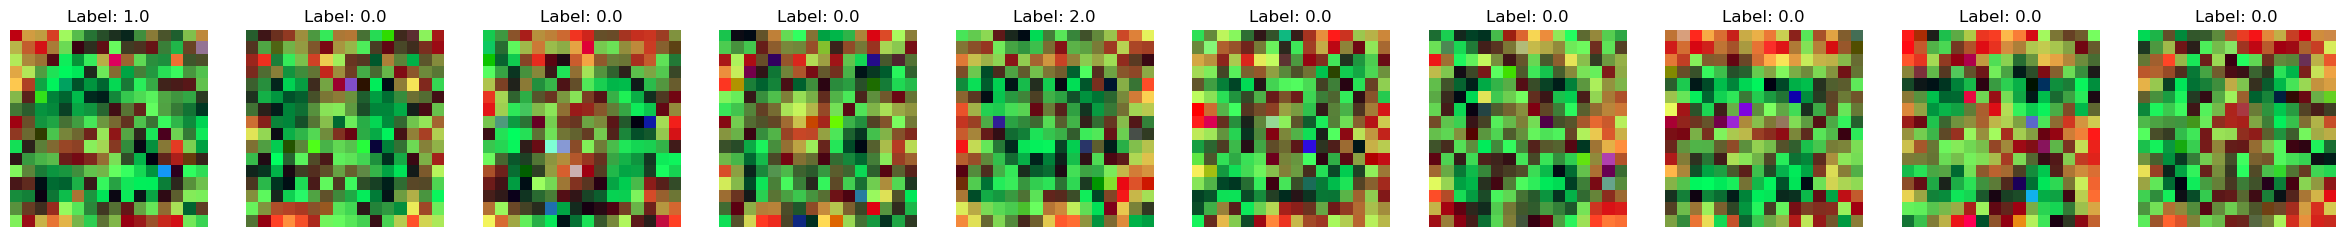

(2911, 3, 16, 16)


In [238]:
def print_one_image(ax, images, labels, index):
    transposed_image = np.transpose(images[index], (1, 2, 0)).astype(np.uint8)
    ax.imshow(transposed_image)
    ax.set_title(f'Label: {labels[index]}')
    ax.axis('off')  # Hide the axes

def print_images(images, labels, start, end):
    num_images = end - start
    fig, axes = plt.subplots(1, num_images, figsize=(num_images * 3, 3))

    # If there is only one image, axes is not a list, so we make it a list for consistency
    if num_images == 1:
        axes = [axes]

    # Display each image in its subplot
    for i, ax in enumerate(axes):
        print_one_image(ax, images, labels, start + i)
    
    plt.show()

# Example usage
print_images(images, labels, 30, 40)
print(images.shape)

## Data Exploration & Preparation

### 1. Descriptive Analysis

Basic information about the dataset is provided below.
- Number of the data point: 2911
- Shape: (2911,)
- Unique values: [ 0.  1.  2. nan]
- Number of labels 0: 2392
- Number of labels 1: 203
- Number of labels 2: 25

In [239]:
def describe_basic_info_labels(labels):
    labels_shape = labels.shape
    print('Shape:', labels_shape)
    print('Unique values:', np.unique(labels))
    print("Number of labels 0:", np.sum(labels == 0))
    print("Number of labels 1:", np.sum(labels == 1))
    print("Number of labels 2:", np.sum(labels == 2))

describe_basic_info_labels(labels)

Shape: (2911,)
Unique values: [ 0.  1.  2. nan]
Number of labels 0: 2392
Number of labels 1: 203
Number of labels 2: 25


(2911,)


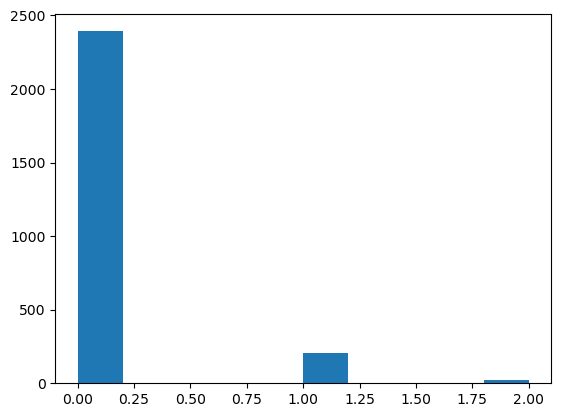

In [240]:
# plot out the labels to see the distribution
plt.hist(labels, bins=10)

print(labels.shape)


In [241]:
def sanity_check_soft(images, labels):
    # no nan in labels
    print("num_rows of images & labels equal: ", images.shape[0] == labels.shape[0])
    print("NO nan pixels in images: ", np.isnan(images).sum()==0)
    print("NO nan in labels: ", np.isnan(labels).sum()==0)

def sanity_check_hard(images, labels):
    assert images.shape[0] == labels.shape[0], "num_rows of images & labels NOT equal"
    assert np.isnan(images).sum()==0, "nan pixels in images"
    assert np.isnan(labels).sum()==0, "nan in labels"
    

### 2. Detection and Handling of Missing Values

Missing vlue: 
- Value: 0.0, Count: 2392
- Value: 1.0, Count: 203
- Value: 2.0, Count: 25
- Value: nan, Count: 291

Handling missing value:
- nan in images: drop the rows with missing value in the image data.
- nan in labels: drop the rows together with the corresponded rows in the image data.
- reason: the number of missing value is small, so it is better to drop the rows with missing value.

In [242]:
'''Detection'''
def find_images_nan_boundaries(images):
    for i in range(1, images.shape[1] * images.shape[2] // 5):
        nan1 = np.sum(np.isnan(images).sum(axis=(1, 2)) >= i)
        nan2 = np.sum(np.isnan(images).sum(axis=(1, 2)) < i)
        print('Images with >= {} NaN values:'.format(i), nan1)
        print('Images with < {} NaN values:'.format(i), nan2)
        print('------------------------')

def print_unique_values_and_counts(arr):
    # Compute the unique values and their counts
    unique_values, counts = np.unique(arr, return_counts=True)

    # Print each unique value along with its count
    for value, count in zip(unique_values, counts):
        print(f'Value: {value}, Count: {count}')

In [243]:
'''Processing'''
def fill_nans_with_zero(images):
    images[np.isnan(images)] = 0
    return images

def remove_nan_labels(labels, images):
    nan_indices = np.argwhere(np.isnan(labels))

    # Remove the corresponding labels
    labels = np.delete(labels, nan_indices, axis=0)
    images = np.delete(images, nan_indices, axis=0)

    return labels, images

In [244]:
# find_images_nan_boundaries(images)
print_unique_values_and_counts(labels)

'''Preprossing'''
# # Fill the missing values with 0
# images = fill_nans_with_zero(images)
labels, images = remove_nan_labels(labels, images)
# print("nan in labels and pixels removed")


Value: 0.0, Count: 2392
Value: 1.0, Count: 203
Value: 2.0, Count: 25
Value: nan, Count: 291


### 3. Detection and Handling of Outliers

The outliers of the data set can be seen from the distribution of the pixels data:
1.  Centralised at around 0: 
    - 29% of the pixels are in the range of -50 to 50; 
    - 60% of pixels are in the range of -100 to 100; 
    - 88% of pixels are in the range of -200 to 200
2. Wide range of values (have outliers):
    - 98% of pixels are in the range of -300 to 300;
    - there are pixels with values as high as 90000 and as low as -9000

Action to process outliers: handled together with the issue of class imbalance (see section 4).

max, min: nan nan
data within +-300: 1953387, 0.980
the number of rest of the data: 39146, 0.020


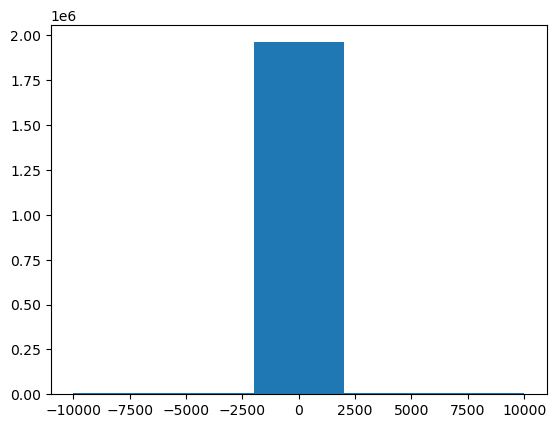

In [245]:
def print_pixels_value_distribution(images, threshold=1000):
    # print the distribution for the values of each pixel
    rest_data = np.sum((images > threshold) | (images < -threshold))
    central_data = np.sum((images <= threshold) & (images >= -threshold))

    print("data within +-{}: {}, {:.3f}".format(threshold, central_data, central_data / (central_data + rest_data)))
    print("the number of rest of the data: {}, {:.3f}".format(rest_data, rest_data / (central_data + rest_data)))
    plt.hist(images.flatten(), bins=5)
    plt.show()

print("max, min:", np.max(images.flatten()), np.min(images.flatten().min()))
print_pixels_value_distribution(images, 300)
# print_pixels_value_distribution(images, 9000)

In [246]:
sanity_check_soft(images, labels)

num_rows of images & labels equal:  True
NO nan pixels in images:  False
NO nan in labels:  True


### 4. Detection and Handling of Class Imbalance

Based on the descriptive analysis, the data is highly imbalanced. 
- Class 0: 2392
- Class 1: 203
- Class 2: 25
- Class nan: removed

Action to process class imbalance: Oversampling class 1 and 2 using image transformation.
- transformation: horizontal flip, vertical flip, rotation, etc.


Value: 0.0, Count: 2392
Value: 1.0, Count: 1827
Value: 2.0, Count: 1525


(array([2392.,    0.,    0.,    0.,    0., 1827.,    0.,    0.,    0.,
        1525.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ],
       dtype=float16),
 <BarContainer object of 10 artists>)

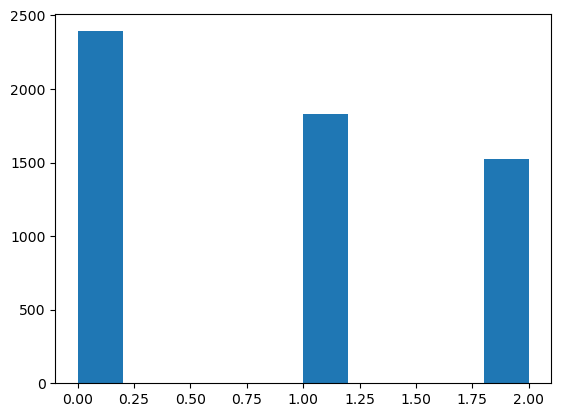

In [247]:
from collections import Counter
def handles_imbalance_fixed(images, labels):
    transform = transforms.Compose([
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomVerticalFlip(),
                    transforms.RandomRotation(15),
                ])
    images_tensor = torch.tensor(images).float()
    labels_tensor = torch.tensor(labels)

    augmented_images = []
    augmented_labels = []

    for img, label in zip(images_tensor, labels_tensor):
        if label == 1:  
            for _ in range(8): 
                augmented_image = transform(img)
                augmented_images.append(augmented_image)
                augmented_labels.append(label)

        elif label == 2:
            for _ in range(60): 
                augmented_image = transform(img)
                augmented_images.append(augmented_image)
                augmented_labels.append(label)

    # Convert augmented data to tensors
    augmented_images_tensor = torch.stack(augmented_images)
    augmented_labels_tensor = torch.tensor(augmented_labels)

    # Convert original labels to tensor (if not already converted)
    original_labels_tensor = torch.tensor(labels)

    # Concatenate original and augmented data
    final_images_tensor = torch.cat((images_tensor, augmented_images_tensor), dim=0)
    final_labels_tensor = torch.cat((original_labels_tensor, augmented_labels_tensor), dim=0)
        
    return final_images_tensor.numpy(), final_labels_tensor.numpy()

# def handles_imbalance(images, labels):
#     # Define the transform
#     transform = transforms.Compose([
#                     transforms.RandomHorizontalFlip(),
#                     transforms.RandomVerticalFlip(),
#                     transforms.RandomRotation(15),
#                 ])

#     # Convert images to tensor
#     images_tensor = torch.tensor(images).float()
#     labels_tensor = torch.tensor(labels)

#     # Calculate the mode of the labels
#     label_counts = Counter(labels)
#     mode_label_count = max(label_counts.values())

#     augmented_images = []
#     augmented_labels = []

#     for img, label in zip(images_tensor, labels_tensor):
#         # Calculate how many augmentations are needed for this label
#         if label_counts[label.item()] > 0 and label_counts[label.item()] < mode_label_count:
#             augmentation_factor = mode_label_count // label_counts[label.item()]

#             for _ in range(augmentation_factor): 
#                 augmented_image = transform(img)
#                 augmented_images.append(augmented_image)
#                 augmented_labels.append(label)

#     # Convert augmented data to tensors
#     augmented_images_tensor = torch.stack(augmented_images)
#     augmented_labels_tensor = torch.tensor(augmented_labels)

#     # Concatenate original and augmented data
#     final_images_tensor = torch.cat((images_tensor, augmented_images_tensor), dim=0)
#     final_labels_tensor = torch.cat((labels_tensor, augmented_labels_tensor), dim=0)
        
#     return final_images_tensor.numpy(), final_labels_tensor.numpy()

images, labels = handles_imbalance_fixed(images, labels)


print_unique_values_and_counts(labels)
plt.hist(labels, bins=10)

In [248]:
# print out the unique values of the pixels in images in table form
def print_unique_values_and_counts_threshold(images, step):
    # Compute the unique values and their counts
    for i in range(-1000, 1000, step):
        print("pixels < {}".format(i))
        print_unique_values_and_counts(images.flatten()<i)

print_unique_values_and_counts_threshold(images, 100)

pixels < -1000
Value: False, Count: 4373236
Value: True, Count: 38156
pixels < -900
Value: False, Count: 4372874
Value: True, Count: 38518
pixels < -800
Value: False, Count: 4372380
Value: True, Count: 39012
pixels < -700
Value: False, Count: 4371848
Value: True, Count: 39544
pixels < -600
Value: False, Count: 4371266
Value: True, Count: 40126
pixels < -500
Value: False, Count: 4370835
Value: True, Count: 40557
pixels < -400
Value: False, Count: 4370440
Value: True, Count: 40952
pixels < -300
Value: False, Count: 4370021
Value: True, Count: 41371
pixels < -200
Value: False, Count: 4369678
Value: True, Count: 41714
pixels < -100
Value: False, Count: 4369251
Value: True, Count: 42141
pixels < 0
Value: False, Count: 4368887
Value: True, Count: 42505
pixels < 100
Value: False, Count: 1523131
Value: True, Count: 2888261
pixels < 200
Value: False, Count: 489672
Value: True, Count: 3921720
pixels < 300
Value: False, Count: 83465
Value: True, Count: 4327927
pixels < 400
Value: False, Count: 83

In [249]:

def scale_images_channelwise(images, scaler_1, scaler_2, scaler_3, training=True):
    # Decompose into three channels numyp array
    c_1 = images[:, 0, :, :]
    c_2 = images[:, 1, :, :]
    c_3 = images[:, 2, :, :]

    # replace values with less than -256 to be 0
    c_1[c_1 < -100] = -100
    c_2[c_2 < -100] = -100
    c_3[c_3 < -100] = -100

    # replace values with more than 256 to be 255
    c_1[c_1 > 256] = 255
    c_2[c_2 > 256] = 255
    c_3[c_3 > 256] = 255

    if training:
        c_1_scaled = scaler_1.fit_transform(c_1.reshape(c_1.shape[0], -1)).reshape(c_1.shape)
        c_2_scaled = scaler_2.fit_transform(c_2.reshape(c_2.shape[0], -1)).reshape(c_2.shape)
        c_3_scaled = scaler_3.fit_transform(c_3.reshape(c_3.shape[0], -1)).reshape(c_3.shape)
    elif False:
        c_1_scaled = scaler_1.transform(c_1.reshape(c_1.shape[0], -1)).reshape(c_1.shape)
        c_2_scaled = scaler_2.transform(c_2.reshape(c_2.shape[0], -1)).reshape(c_2.shape)
        c_3_scaled = scaler_3.transform(c_3.reshape(c_3.shape[0], -1)).reshape(c_3.shape)
    else:
        c_1_scaled = c_1
        c_2_scaled = c_2
        c_3_scaled = c_3
    # check no nan values
    fill_nans_with_zero(c_1_scaled)
    fill_nans_with_zero(c_2_scaled)
    fill_nans_with_zero(c_3_scaled)

    # combine the three channels back to one image
    images_scaled = np.stack([c_1_scaled, c_2_scaled, c_3_scaled], axis=1)
    # print("images_scaled shape: ", images_scaled.shape)
    return images_scaled

# scale_images_channelwise(images)

images = scale_images_channelwise(images, RobustScaler(), RobustScaler(), RobustScaler())


Value: False, Count: 4411392
num_rows of images & labels equal:  True
NO nan pixels in images:  True
NO nan in labels:  True


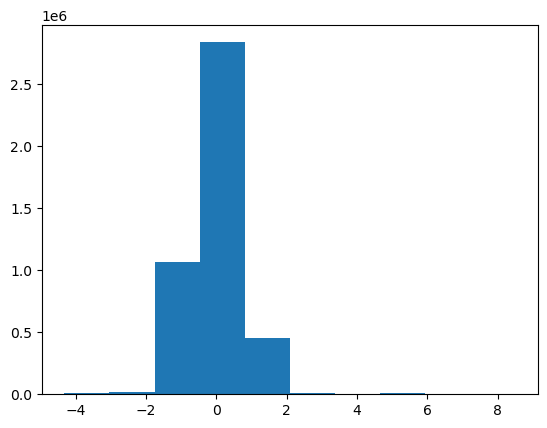

In [250]:
print_unique_values_and_counts(images.flatten()<-80)

plt.hist(images.flatten(), bins=10)
sanity_check_soft(images, labels)

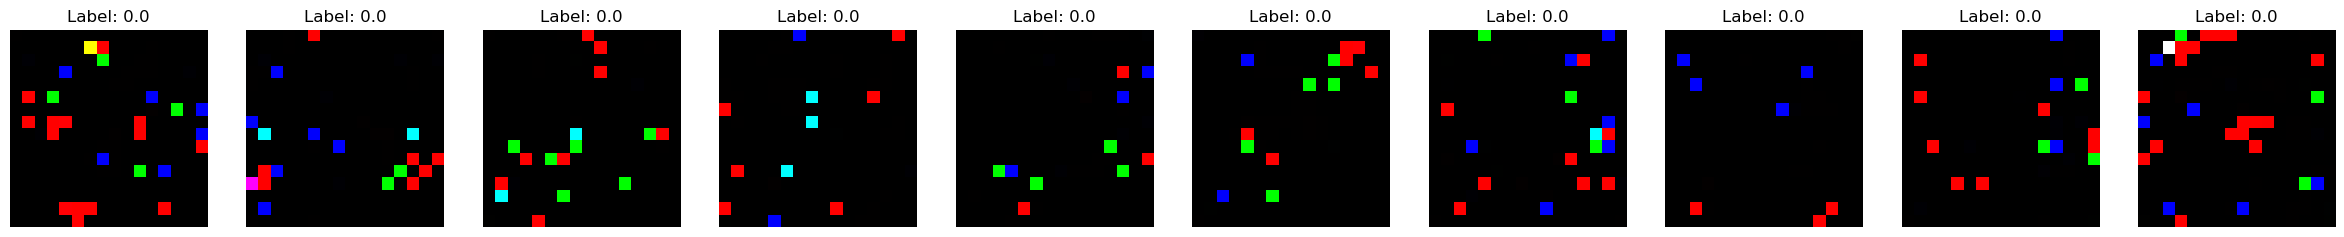

In [251]:
for i in range (1000, 1010, 10):
    print_images(images, labels, i, i + 10)

### 5. Understanding Relationship Between Variables

Correlation of such instances are investigated:
- the features of each channel: only channel one has its features more correleated (seen in the section below) less correlated
- correlation between 2 channel: all channels are not closely correlated in a large scale.

(5744, 256)


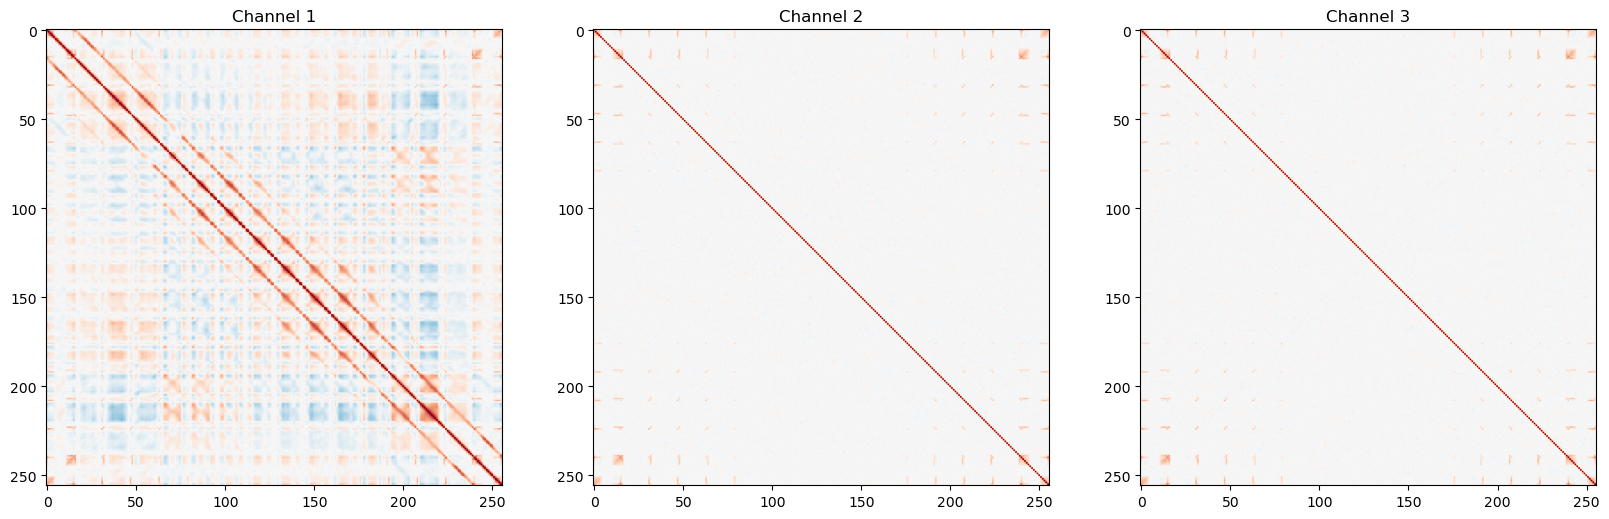

In [252]:
# flatten the images
c1, c2, c3 = images[:, 0, :, :], images[:, 1, :, :], images[:, 2, :, :]

# combine them into a dataframe 
c1 = c1.reshape(c1.shape[0], -1)
c2 = c2.reshape(c2.shape[0], -1)
c3 = c3.reshape(c3.shape[0], -1)
print(c1.shape)
# combine pairwise channels into one dataframe
correlation_c1 = pd.DataFrame(c1).corr()
correlation_c2 = pd.DataFrame(c2).corr()
correlation_c3 = pd.DataFrame(c3).corr()

# plot all correlation matrices in 3 rows and 1 column
fig, axes = plt.subplots(1, 3, figsize=(20, 30))
axes[0].imshow(correlation_c1, cmap='RdBu_r', vmin=-1, vmax=1)
axes[0].set_title('Channel 1')
axes[1].imshow(correlation_c2, cmap='RdBu_r', vmin=-1, vmax=1)
axes[1].set_title('Channel 2')
axes[2].imshow(correlation_c3, cmap='RdBu_r', vmin=-1, vmax=1)
axes[2].set_title('Channel 3')
plt.show()


(5744, 256)


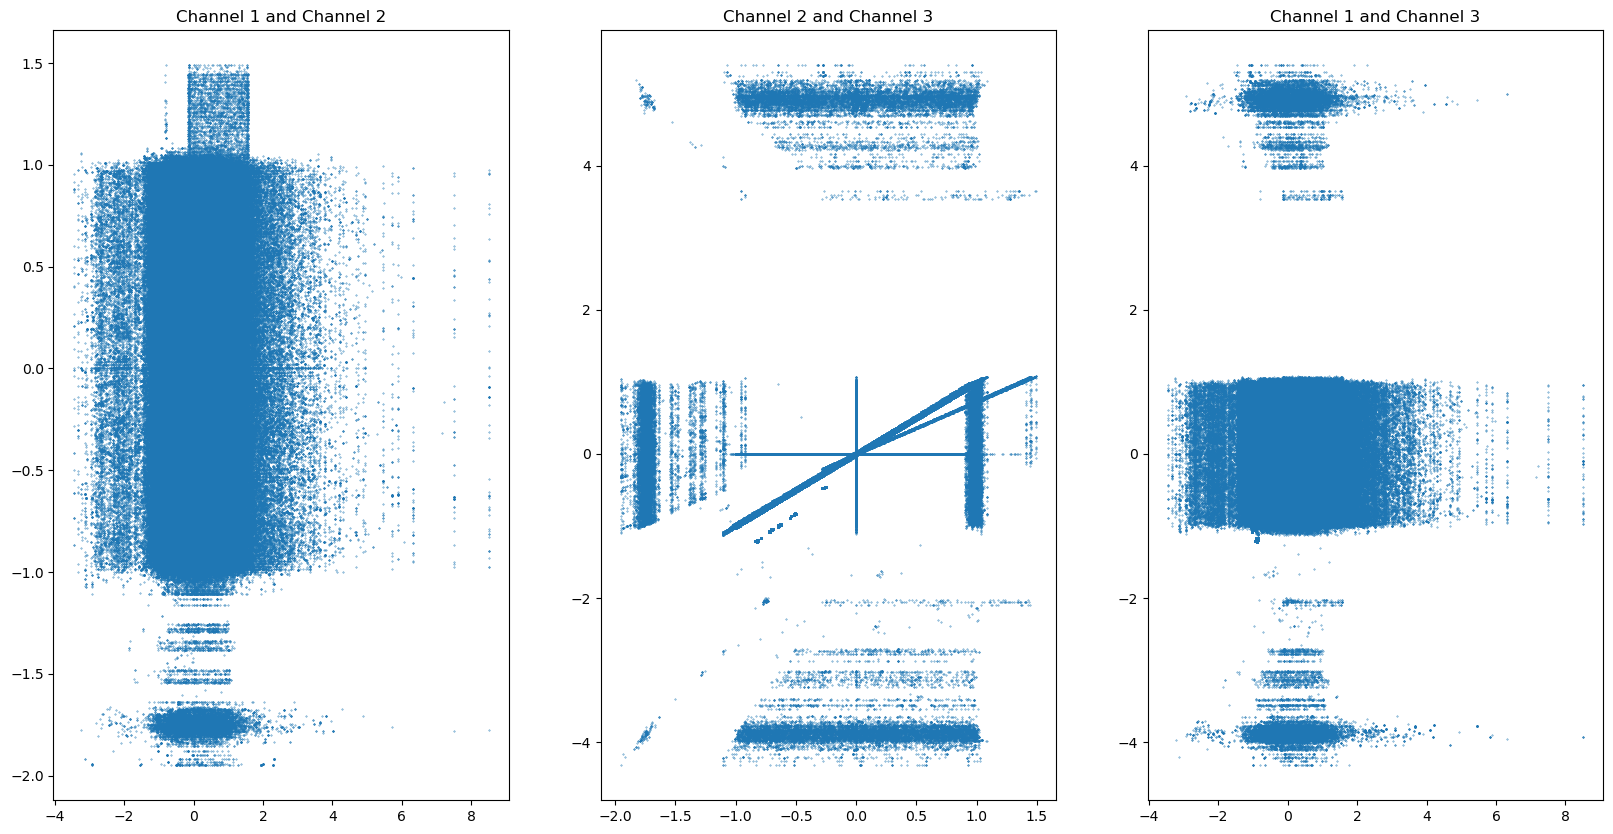

In [253]:
# decompose each channel
c1, c2, c3 = images[:, 0, :, :], images[:, 1, :, :], images[:, 2, :, :]

print(c1.reshape(c1.shape[0], -1).shape)

# plot the scatter plot of c1 and c2, c2 and c3, c1 and c3
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
axes[0].scatter(c1.reshape(c1.shape[0], -1), c2.reshape(c2.shape[0], -1), s=0.1)
axes[0].set_title('Channel 1 and Channel 2')
axes[1].scatter(c2.reshape(c2.shape[0], -1), c3.reshape(c3.shape[0], -1), s=0.1)
axes[1].set_title('Channel 2 and Channel 3')
axes[2].scatter(c1.reshape(c1.shape[0], -1), c3.reshape(c3.shape[0], -1), s=0.1)
axes[2].set_title('Channel 1 and Channel 3')
plt.show()


# Try PCA

In [254]:
sanity_check_soft(images, labels)

def flatten_pca(images, pca_1, pca_2, pca_3, training=True):
    # reshape the images into 2D array for each channel
    c_1 = images[:, 0, :, :].reshape(images.shape[0], -1)
    c_2 = images[:, 1, :, :].reshape(images.shape[0], -1)
    c_3 = images[:, 2, :, :].reshape(images.shape[0], -1)

    if training:
        # perform PCA on each channel
        c_1_pca = pca_1.fit_transform(c_1)
        c_2_pca = pca_2.fit_transform(c_2)
        c_3_pca = pca_3.fit_transform(c_3)

    else: 
        c_1_pca = pca_1.transform(c_1)
        c_2_pca = pca_2.transform(c_2)
        c_3_pca = pca_3.transform(c_3)

    input_pca = np.concatenate((c_1_pca[:, None], c_2_pca[:, None], c_3_pca[:, None]), axis=1).reshape(images.shape[0], -1)
    print("input_pca.shape:", input_pca.shape)
    return input_pca

input_X_pca = flatten_pca(images, PCA(n_components=10), PCA(n_components=10), PCA(n_components=10))

num_rows of images & labels equal:  True
NO nan pixels in images:  True
NO nan in labels:  True
input_pca.shape: (5744, 30)


# Try out PCA neural network


### 6. Data Visualization

## Data Preprocessing

### 7. General Preprocessing

### 8. Feature Selection

Attempt: 
1. ordinary image interpretation:
2. flatten pixels interpretation:

### 9. Feature Engineering

Attempt: 
1. ordinary image interpretation:
2. flatten pixels interpretation:

## Modeling & Evaluation

### 10. Creating models

Two models have been created, one using PCA and one without PCA. The model without PCA is a simple neural network with 3 hidden layers. The model with PCA is a neural network with 3 hidden layers, with the first hidden layer being the PCA layer.

1. CNN Neural Network:
    - main idea: the input data has 3 channels, so I see them as 3 images for each data point; and this will be handled as normal image data.
    - implementation: Each channel is handled by a CNN, which will go through several layers and the outputs are concatenated and fed into a neural network to output 3 categories.
    - hyperparameters: 
        - CNN: 
            - kernel size = 3
            - stride = 1
            - padding = 1
            - max pooling = 2
            - number of filters = 16
        - neural network:
            - activation function = LeakyReLU
            - dropout: 
            - learning rate:
            - number of epochs:
            - optimizer = Adam
            - loss function = CrossEntropyLoss 

2. PCA + Neural Network:
    - main idea: an alternative to handle image data is to flatten out the whole image. PCA to reduce the number of features, and then feed the reduced features into a neural network.
    - hyperparameters:
        - PCA:
            - number of components = 36
        - neural network: more or less the same as the neural network above.



In [255]:
class Model_PCA(nn.Module):
    """
    This class represents an AI model.
    """
    def __init__(self, ):
        super(Model_PCA, self).__init__()
        self.pca_1 = PCA(n_components=36)
        self.pca_2 = PCA(n_components=36)
        self.pca_3 = PCA(n_components=36)

      # CNN for Image Data
        self.dense = nn.Sequential(
            nn.Linear(36 * 3, 256),
            nn.BatchNorm1d(256),
            nn.LeakyReLU(),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.LeakyReLU(),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.LeakyReLU(),

            nn.Linear(64, 3)
        )
        
    def train_model(self, train_dataset, criterion, optimizer, batch_size, num_epochs):
            self.train()
            running_loss = 0.0
            # Create DataLoaders inside the training function
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

            for epoch in range(num_epochs):
                running_loss = 0.0
                for images, labels in train_loader:
                    if images.shape[0] != batch_size:
                        continue

                    optimizer.zero_grad()
                    outputs = self(images)

                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    running_loss += loss.item()
                print(f"Epoch {epoch+1} - Training loss: {running_loss/len(train_loader)}")

    def forward(self, x_img):
        x_img = self.dense(x_img)
        return x_img


    def preprocess_train(self, images, labels):
        '''handle missing values'''
        # images = fill_nans_with_zero(images)
        images = fill_nans_with_zero(images)
        labels, images = remove_nan_labels(labels, images) # rows

        '''handle class imbalance'''
        images, labels = handles_imbalance_fixed(images, labels) # rows

        '''scale images'''
        images = flatten_pca(images, self.pca_1, self.pca_2, self.pca_3)
        # (5744, 3, 36)

        assert type(images) == np.ndarray
        assert images.shape[0] == labels.shape[0]

        return images, labels


    def preprocess_test(self, images):
        images = fill_nans_with_zero(images)

        '''scale images'''
        images = flatten_pca(images, self.pca_1, self.pca_2, self.pca_3, training=False)

        assert type(images) == np.ndarray
        return images


    def fit(self, images, labels):
        '''Preprocess data'''
        images, labels = self.preprocess_train(images, labels)

        '''Wrap data in Dataset class'''
        # Convert data to TensorDataset
        img_train_tensor = torch.tensor(images).float()  # Image data remains as floats
        labels_train_tensor = torch.tensor(labels).long()  # Convert labels to long
        train_dataset = TensorDataset(img_train_tensor, labels_train_tensor)

        '''Train the model'''
        criterion = nn.CrossEntropyLoss()  # Using CrossEntropyLoss for classification
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        self.train_model(train_dataset, criterion, optimizer, batch_size=16, num_epochs=10)

    def predict(self, images):
        '''Preprocess data'''
        images = self.preprocess_test(images)

        '''Wrap data in Dataset class'''
        # Convert data to TensorDataset
        assert type(images) == np.ndarray, "images is not a numpy array"
        img_test_tensor = torch.tensor(images).float()

        self.eval()
        with torch.no_grad():
            outputs = self(img_test_tensor)
        pred = torch.argmax(nn.Softmax(dim=1)(outputs), dim=1).numpy()

        assert pred.shape == (images.shape[0],), "pred has the wrong shape {}".format(pred.shape)

        return pred
        

### 11. Model Evaluation

each model is evaluated from the perspective of f1-score, runtime, and memory.
- Memory: the memory is not an issue in my training, because the data set given is not large enough to cause memory issues like the data in mock test.
- Runtime: the runtime is not an issue in my training, because the data set given is not large enough to cause memory issues like the data in mock test.
- f1-score: the f1-score is calculated after every training epoch, and the model is chosen based on the f1-score.

- **Choosing of the model:**
    - Operation: the each configuration is runned for 5 times (as shown in code snippet below), and the model is evaluated by the minimum, maximum, and average f1-score. 
    - Tie Breaker: No absolute tie breaker. Model with lower difference (max - min), i.e. stability and low variance, and higher mean of f1-score, i.e. low bias, is preferred, although both factors are often trade-off of each other. 


In [258]:
f1_train_all = []
f1_test_all = []

for i in range(5):
    pass
    # import tracemalloc
    # tracemalloc.start()

    # # Split train and test
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

    # # Filter test data that contains no labels
    # # In Coursemology, the test data is guaranteed to have labels
    # nan_indices = np.argwhere(np.isnan(y_test)).squeeze()
    # mask = np.ones(y_test.shape, bool)
    # mask[nan_indices] = False
    # X_test = X_test[mask]
    # y_test = y_test[mask]

    # # Train and predict
    # model = Model()
    # # model.to(device)
    # model.fit(X_train, y_train)

    # nan_indices = np.argwhere(np.isnan(y_train)).squeeze()
    # mask = np.ones(y_train.shape, bool)
    # mask[nan_indices] = False
    # X_train = X_train[mask]
    # y_train = y_train[mask]
    # y_train_pred = model.predict(X_train)

    # y_pred = model.predict(X_test)

    # # Evaluate model predition
    # # Learn more: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    # f1_train = f1_score(y_train, y_train_pred, average='macro')
    # f1_test = f1_score(y_test, y_pred, average='macro')
    # f1_train_all.append(f1_train)
    # f1_test_all.append(f1_test)
    # print("F1 Score (macro): {0:.2f}".format(f1_train)) # You may encounter errors, you are expected to figure out what's the issue.
    # print("F1 Score (macro): {0:.2f}".format(f1_test)) # You may encounter errors, you are expected to figure out what's the issue.

    # '''----------memory evaluation-------------'''
    # size = tracemalloc.get_traced_memory()
    # current_size_in_mb = size[0] / (1024 * 1024)
    # peak_size_in_mb = size[1] / (1024 * 1024)

    # tracemalloc.stop()

    # print(f"Current memory usage: {current_size_in_mb:.2f} MB")
    # print(f"Peak memory usage: {peak_size_in_mb:.2f} MB")

# print("F1 train: {0:.2f}, {1:.2f}, {2:.2f}".format(np.mean(f1_train_all), np.min(f1_train_all), np.max(f1_train_all)))
# print("F1 test: {0:.2f}, {1:.2f}, {2:.2f}".format(np.mean(f1_test_all), np.min(f1_test_all), np.max(f1_test_all)))

### 12. Hyperparameters Search